In [20]:
# EDA with CSV data sets

In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
shared_drive_data_path = '/content/gdrive/MyDrive/capstone-project/data'

In [4]:
os.chdir(shared_drive_data_path)
os.listdir()

['NF-BoT-IoT',
 'NF-CSE-CIC-IDS2018',
 'NF-UQ-NIDS',
 'NF-UNSW-NB15-v2',
 'NF-ToN-IoT-v2',
 'NF-BoT-IoT-v2',
 'NF-CSE-CIC-IDS2018-v2',
 'NF-UQ-NIDS-v2',
 'CIC-ToN-IoT',
 'CIC-BoT-IoT',
 '.ipynb_checkpoints',
 'parquet',
 'NF-UNSW-NB15',
 'NF-ToN-IoT']

In [5]:
pwd=os.getcwd()

In [7]:
df_nf_uq_nids_v1=pd.read_csv(pwd+'/NF-UQ-NIDS/data/NF-UQ-NIDS.csv')

In [7]:
df_nf_uq_nids_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11994893 entries, 0 to 11994892
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   IPV4_SRC_ADDR               object 
 1   L4_SRC_PORT                 int64  
 2   IPV4_DST_ADDR               object 
 3   L4_DST_PORT                 int64  
 4   PROTOCOL                    int64  
 5   L7_PROTO                    float64
 6   IN_BYTES                    int64  
 7   OUT_BYTES                   int64  
 8   IN_PKTS                     int64  
 9   OUT_PKTS                    int64  
 10  TCP_FLAGS                   int64  
 11  FLOW_DURATION_MILLISECONDS  int64  
 12  Label                       int64  
 13  Attack                      object 
 14  Dataset                     object 
dtypes: float64(1), int64(10), object(4)
memory usage: 1.3+ GB


In [8]:
df_nf_uq_nids_v1.shape

(11994893, 15)

In [9]:
df_nf_uq_nids_v1['Label'].unique()

array([0, 1])

In [10]:
df_nf_uq_nids_v1['Attack'].unique()

array(['Benign', 'Exploits', 'Reconnaissance', 'DoS', 'Generic',
       'Shellcode', 'Backdoor', 'Fuzzers', 'Worms', 'Analysis',
       'injection', 'DDoS', 'scanning', 'password', 'mitm', 'xss',
       'ransomware', 'Infilteration', 'Bot', 'Brute Force', 'Theft'],
      dtype=object)

In [11]:
df_nf_uq_nids_v1[df_nf_uq_nids_v1.duplicated()]

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,Dataset
4023,10.40.85.10,0,192.168.241.50,0,1,81.0,168,0,2,0,0,0,0,Benign,NF-UNSW-NB15
4651,10.40.85.1,0,224.0.0.5,0,89,85.0,768,0,12,0,0,110009,0,Benign,NF-UNSW-NB15
4652,10.40.182.1,0,224.0.0.5,0,89,85.0,768,0,12,0,0,110009,0,Benign,NF-UNSW-NB15
7236,10.40.85.1,0,224.0.0.5,0,89,85.0,768,0,12,0,0,110009,0,Benign,NF-UNSW-NB15
7237,10.40.182.1,0,224.0.0.5,0,89,85.0,768,0,12,0,0,110009,0,Benign,NF-UNSW-NB15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394694,172.31.69.7,0,172.31.0.2,0,1,0.0,202,0,2,0,0,0,0,Benign,NF-CSE-CIC-IDS2018
11394705,131.202.242.193,9638,172.31.69.7,22,6,0.0,1648,0,6,0,24,0,0,Benign,NF-CSE-CIC-IDS2018
11394706,172.31.69.7,22,131.202.242.193,9638,6,0.0,2952,0,5,0,24,0,0,Benign,NF-CSE-CIC-IDS2018
11394715,172.31.69.7,0,172.31.0.2,0,1,0.0,200,0,2,0,0,0,0,Benign,NF-CSE-CIC-IDS2018


In [71]:
11994893 - 1265854

10729039

In [12]:
df_nf_uq_nids_v1 = df_nf_uq_nids_v1.drop_duplicates()

In [13]:
df_nf_uq_nids_v1.shape

(10729039, 15)

In [14]:
df_nf_uq_nids_v1.isna().sum()

IPV4_SRC_ADDR                 0
L4_SRC_PORT                   0
IPV4_DST_ADDR                 0
L4_DST_PORT                   0
PROTOCOL                      0
L7_PROTO                      0
IN_BYTES                      0
OUT_BYTES                     0
IN_PKTS                       0
OUT_PKTS                      0
TCP_FLAGS                     0
FLOW_DURATION_MILLISECONDS    0
Label                         0
Attack                        0
Dataset                       0
dtype: int64

**No Null Values in the above data set df_nf_uq_nids_v1**




In [15]:
df_nf_uq_nids_v1['Dataset'].unique()

array(['NF-UNSW-NB15', 'NF-ToN-IoT', 'NF-CSE-CIC-IDS2018', 'NF-BoT-IoT'],
      dtype=object)

In [16]:
df_nf_uq_nids_v1.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label', 'Attack',
       'Dataset'],
      dtype='object')

<ipython-input-17-d10a3be7cdb6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1=df_nf_uq_nids_v1.corr()


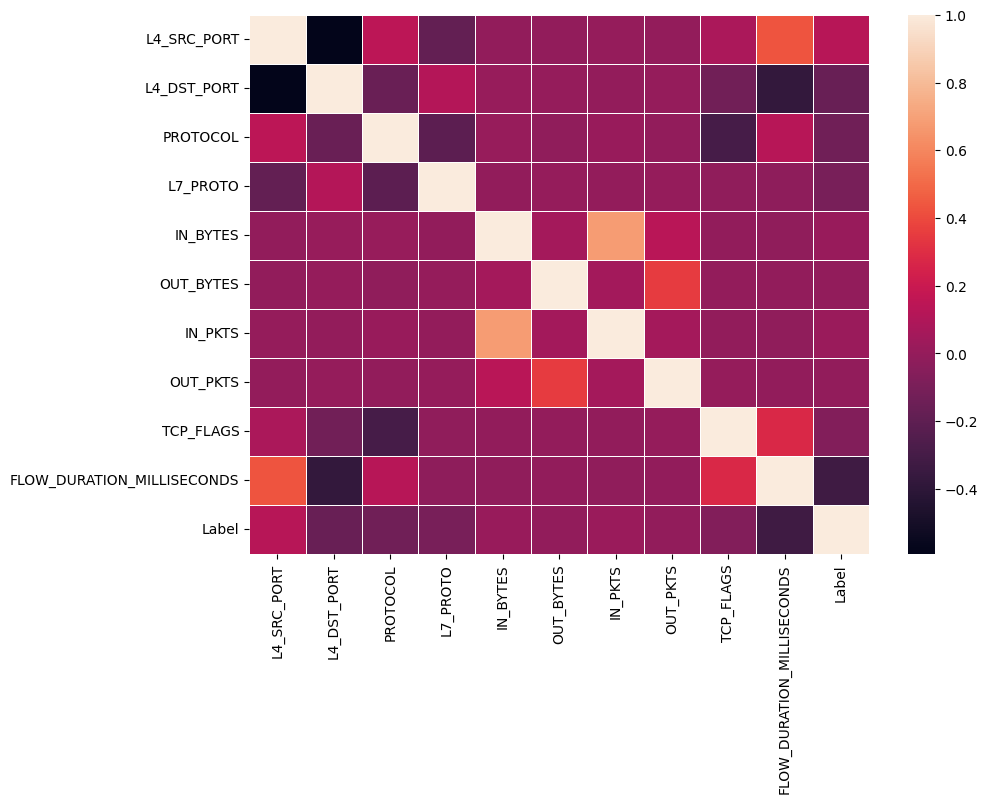

In [17]:
plt.figure(figsize = (10,7))
corr1=df_nf_uq_nids_v1.corr()
ax = sns.heatmap(corr1, annot=False, linewidths=.6)

**FLOW_DURATION_MILLISECONDS are having negative correlation with Label**

In [18]:
# Excluding label, attack,dataset and IPV4_SRC_ADDR,IPV4_DST_ADDR
X=df_nf_uq_nids_v1[['L4_SRC_PORT', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [19]:
X.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS
0,62073,56082,6,0.0,9672,416,11,8,25,15
1,32284,1526,6,0.0,1776,104,6,2,25,0
2,21,21971,6,1.0,1842,1236,26,22,25,1111
3,23800,46893,6,0.0,528,8824,10,12,27,124
4,63062,21,6,1.0,1786,2340,32,34,25,1459


In [20]:
y=df_nf_uq_nids_v1['Label']

In [ ]:
#PCA for Visualizing the data in Two dimensional space to see any anomalies/outliers

In [21]:
scaler=StandardScaler()
X = scaler.fit_transform(X)

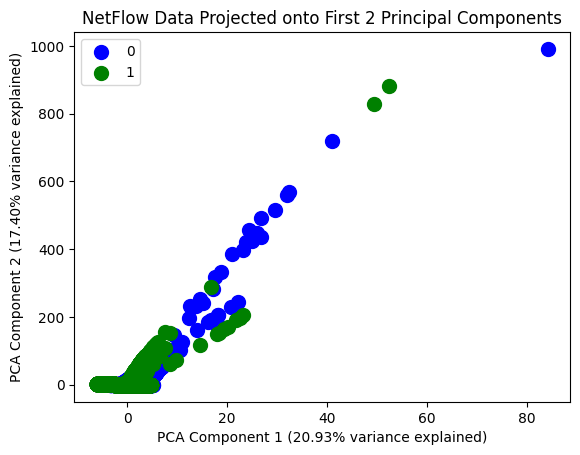

In [22]:
pca = PCA(n_components=2).fit(X)
attack_PCA = pca.transform(X)

scatter_x = np.array(attack_PCA[:,0])
scatter_y = np.array(attack_PCA[:,1])
cdict = {0: 'blue', 1: 'green'}
fig, ax = plt.subplots()
for g in np.unique(y):
    ix = np.where(y == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance explained)')
plt.ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance explained)')
plt.title('NetFlow Data Projected onto First 2 Principal Components');
plt.show()

**Observed two elongated clusters between benign and non benign**

**NF-BoT-IoT-v1**

In [1]:
# Erroring out due to time out as it has huge data.
#df_nf_uq_nids_v2=pd.read_csv(os.getcwd()+'/NF-UQ-NIDS-v2/data/NF-UQ-NIDS-v2.csv')

In [6]:
df_nf_BoT_iot_v1=pd.read_csv(pwd+'/NF-BoT-IoT/data/NF-BoT-IoT.csv')

In [7]:
df_nf_BoT_iot_v1.shape

(600100, 14)

In [8]:
df_nf_BoT_iot_v1[df_nf_BoT_iot_v1.duplicated()]

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack


**No Duplicates**

In [9]:
df_nf_BoT_iot_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600100 entries, 0 to 600099
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   IPV4_SRC_ADDR               600100 non-null  object 
 1   L4_SRC_PORT                 600100 non-null  int64  
 2   IPV4_DST_ADDR               600100 non-null  object 
 3   L4_DST_PORT                 600100 non-null  int64  
 4   PROTOCOL                    600100 non-null  int64  
 5   L7_PROTO                    600100 non-null  float64
 6   IN_BYTES                    600100 non-null  int64  
 7   OUT_BYTES                   600100 non-null  int64  
 8   IN_PKTS                     600100 non-null  int64  
 9   OUT_PKTS                    600100 non-null  int64  
 10  TCP_FLAGS                   600100 non-null  int64  
 11  FLOW_DURATION_MILLISECONDS  600100 non-null  int64  
 12  Label                       600100 non-null  int64  
 13  Attack        

In [10]:
df_nf_BoT_iot_v1.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,192.168.100.6,52670,192.168.100.1,53,17,5.212,71,126,1,1,0,4294966,0,Benign
1,192.168.100.6,49160,192.168.100.149,4444,6,0.000,217753000,199100,4521,4049,24,4176249,1,Theft
2,192.168.100.46,3456,192.168.100.5,80,17,0.000,8508021,8918372,9086,9086,0,4175916,0,Benign
3,192.168.100.3,80,192.168.100.55,8080,6,7.000,8442138,9013406,9086,9086,0,4175916,0,Benign
4,192.168.100.46,80,192.168.100.5,80,6,7.000,8374706,0,9086,0,0,4175916,0,Benign


In [11]:
df_nf_BoT_iot_v1['Attack'].unique()

array(['Benign', 'Theft', 'DDoS', 'DoS', 'Reconnaissance'], dtype=object)

In [12]:
df_nf_BoT_iot_v1['Label'].unique()

array([0, 1])

In [13]:
# Excluding label, attack,dataset and IPV4_SRC_ADDR,IPV4_DST_ADDR
X=df_nf_BoT_iot_v1[['L4_SRC_PORT', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [14]:
y=df_nf_BoT_iot_v1['Label']

In [15]:
y=np.array(y)

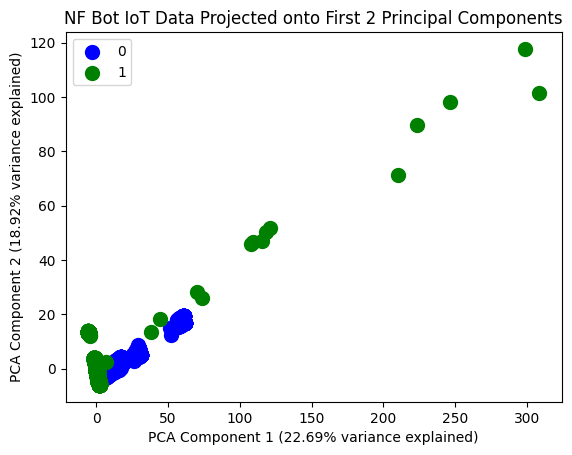

In [16]:
scaler=StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2).fit(X)
attack_PCA = pca.transform(X)

scatter_x = np.array(attack_PCA[:,0])
scatter_y = np.array(attack_PCA[:,1])
cdict = {0: 'blue', 1: 'green'}
fig, ax = plt.subplots()
for g in np.unique(y):
    ix = np.where(y == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance explained)')
plt.ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance explained)')
plt.title('NF Bot IoT Data Projected onto First 2 Principal Components');
plt.show()

Observed two elongated clusters between benign and non benign

In [17]:
#pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=bd2a1c4823df272da91c167e09f2de93ba5be84289823445c63454187e8fd33d
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [18]:
#from umap import UMAP
#umap_model = UMAP(n_components=2).fit(X)
#umap_result = umap_model.transform(X)

KeyboardInterrupt: 

In [19]:
## Create a scatter plot
#plt.figure(figsize=(8, 6))
#plt.scatter(umap_result[:, 0], umap_result[:, 1], c='blue', alpha=0.5, edgecolors='w')

# Set axis labels and title
#plt.xlabel('UMAP Component 1')
#plt.ylabel('UMAP Component 2')
#plt.title('UMAP Visualization of Clusters')

# Show the plot
#plt.show()

**NF-BoT-IoT-v2**

In [ ]:
# Erroring Out huge data
#df_nf_BoT_iot_v2=pd.read_csv(pwd+'/NF-BoT-IoT-v2/data/NF-BoT-IoT-v2.csv')

**NF-ToN-IoT-v1**

In [24]:
df_nf_ToN_iot_v1=pd.read_csv(pwd+'/NF-ToN-IoT/data/NF-ToN-IoT.csv')

In [25]:
df_nf_ToN_iot_v1.shape

(1379274, 14)

In [26]:
df_nf_ToN_iot_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379274 entries, 0 to 1379273
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   IPV4_SRC_ADDR               1379274 non-null  object 
 1   L4_SRC_PORT                 1379274 non-null  int64  
 2   IPV4_DST_ADDR               1379274 non-null  object 
 3   L4_DST_PORT                 1379274 non-null  int64  
 4   PROTOCOL                    1379274 non-null  int64  
 5   L7_PROTO                    1379274 non-null  float64
 6   IN_BYTES                    1379274 non-null  int64  
 7   OUT_BYTES                   1379274 non-null  int64  
 8   IN_PKTS                     1379274 non-null  int64  
 9   OUT_PKTS                    1379274 non-null  int64  
 10  TCP_FLAGS                   1379274 non-null  int64  
 11  FLOW_DURATION_MILLISECONDS  1379274 non-null  int64  
 12  Label                       1379274 non-null  int64  
 1

In [27]:
df_nf_ToN_iot_v1.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,192.168.1.195,63318,52.139.250.253,443,6,91.00,181,165,2,1,24,327,0,Benign
1,192.168.1.79,57442,192.168.1.255,15600,17,0.00,63,0,1,0,0,0,0,Benign
2,192.168.1.79,57452,239.255.255.250,15600,17,0.00,63,0,1,0,0,0,0,Benign
3,192.168.1.193,138,192.168.1.255,138,17,10.16,472,0,2,0,0,0,0,Benign
4,192.168.1.79,51989,192.168.1.255,15600,17,0.00,63,0,1,0,0,0,0,Benign


In [28]:
# Excluding label, attack,dataset and IPV4_SRC_ADDR,IPV4_DST_ADDR
X=df_nf_ToN_iot_v1[['L4_SRC_PORT', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [29]:
y=df_nf_ToN_iot_v1['Label']

In [30]:
scaler=StandardScaler()
X = scaler.fit_transform(X)

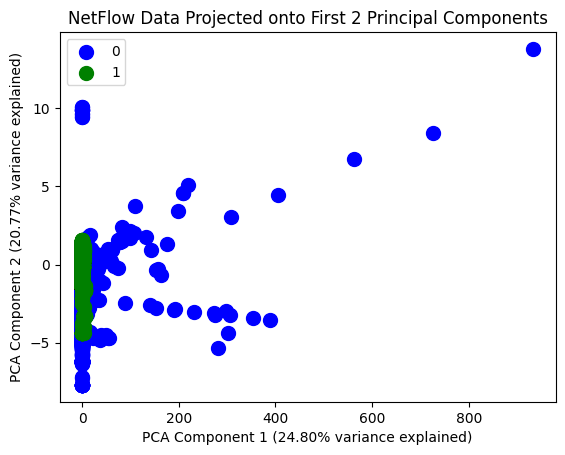

In [31]:
pca = PCA(n_components=2).fit(X)
attack_PCA = pca.transform(X)

scatter_x = np.array(attack_PCA[:,0])
scatter_y = np.array(attack_PCA[:,1])
cdict = {0: 'blue', 1: 'green'}
fig, ax = plt.subplots()
for g in np.unique(y):
    ix = np.where(y == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance explained)')
plt.ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance explained)')
plt.title('NetFlow Data Projected onto First 2 Principal Components');
plt.show()

**NF-UNSW-NB15**

In [9]:
df_nf_UNSW_NB15=pd.read_csv(pwd+'/NF-UNSW-NB15/data/NF-UNSW-NB15.csv')

In [10]:
df_nf_UNSW_NB15.shape

(1623118, 14)

In [11]:
df_nf_UNSW_NB15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623118 entries, 0 to 1623117
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   IPV4_SRC_ADDR               1623118 non-null  object 
 1   L4_SRC_PORT                 1623118 non-null  int64  
 2   IPV4_DST_ADDR               1623118 non-null  object 
 3   L4_DST_PORT                 1623118 non-null  int64  
 4   PROTOCOL                    1623118 non-null  int64  
 5   L7_PROTO                    1623118 non-null  float64
 6   IN_BYTES                    1623118 non-null  int64  
 7   OUT_BYTES                   1623118 non-null  int64  
 8   IN_PKTS                     1623118 non-null  int64  
 9   OUT_PKTS                    1623118 non-null  int64  
 10  TCP_FLAGS                   1623118 non-null  int64  
 11  FLOW_DURATION_MILLISECONDS  1623118 non-null  int64  
 12  Label                       1623118 non-null  int64  
 1

In [12]:
# Excluding label, attack,dataset and IPV4_SRC_ADDR,IPV4_DST_ADDR
X=df_nf_UNSW_NB15[['L4_SRC_PORT', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [13]:
y=df_nf_UNSW_NB15['Label']

In [14]:
scaler=StandardScaler()
X = scaler.fit_transform(X)

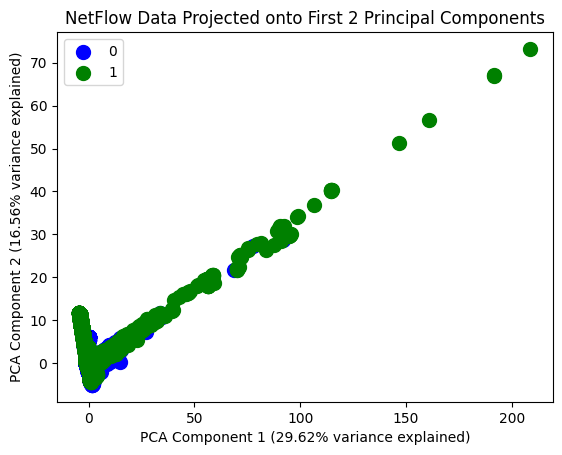

In [13]:
pca = PCA(n_components=2).fit(X)
attack_PCA = pca.transform(X)

scatter_x = np.array(attack_PCA[:,0])
scatter_y = np.array(attack_PCA[:,1])
cdict = {0: 'blue', 1: 'green'}
fig, ax = plt.subplots()
for g in np.unique(y):
    ix = np.where(y == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance explained)')
plt.ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance explained)')
plt.title('NetFlow Data Projected onto First 2 Principal Components');
plt.show()

In [16]:
import pandas as pd
import networkx as nx

In [19]:
G = nx.from_pandas_edgelist(df_nf_ToN_iot_v1, 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR', create_using=nx.DiGraph())


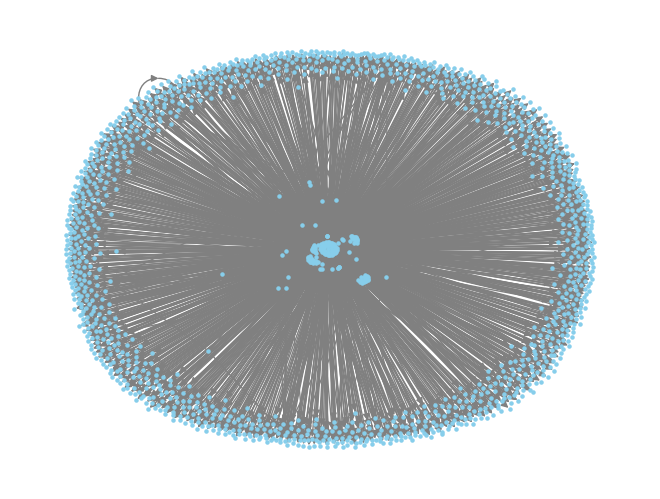

In [26]:
import matplotlib.pyplot as plt

# Choose a layout algorithm (e.g., spring_layout)
pos = nx.spring_layout(G)

# Draw the network
nx.draw(G, pos, with_labels=False, node_size=5, node_color='skyblue', edge_color='gray', font_size=8)

# Show the plot
plt.show()
